In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['feature.xlsx', 'test_label_sample.csv', 'train_label.csv']


In [11]:
train =pd.read_csv('input/train_label.csv')

In [12]:
train.head() # to check the head of the dataset

,date,label
0,3/5/2015,NaN
1,4/5/2015,0.0
2,5/5/2015,0.0
3,6/5/2015,0.0
4,7/5/2015,0.0


In [13]:
train.tail()

,date,label
679,20/3/2017,0.0
680,21/3/2017,0.0
681,22/3/2017,0.0
682,23/3/2017,1.0
683,24/3/2017,1.0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 2 columns):
date     684 non-null object
label    683 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


In [15]:
train.describe()

,label
count,683.000000
mean,0.064422
std,0.245683
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
train.isnull().sum() # found one nan value in the dataset 

date     0
label    1
dtype: int64

In [17]:
train[train['label']==1].count()

date     44
label    44
dtype: int64

In [18]:
train[train['label']==0].count()

date     639
label    639
dtype: int64

In [19]:
from datetime import datetime
data = [go.Scatter(x=train.date, y=train['label'])]

py.iplot(data, filename = 'time-series-simple')

In [20]:
train.fillna(0,inplace=True) #by using fillna we can replace nan with 0

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 2 columns):
date     684 non-null object
label    684 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


In [22]:
X=train.drop('label',axis=1)
y=train.label

In [23]:
X.shape

(684, 1)

In [24]:
y.shape

(684,)

In [25]:
import datetime as dt
X['date'] = pd.to_datetime(X['date'])
X['date']=X['date'].map(dt.datetime.toordinal)

X['date'].head()

0    735662
1    735693
2    735723
3    735754
4    735784
Name: date, dtype: int64

### Using train test split function because test data showing some error to read it

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=60,test_size=0.20) 

In [27]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
y_predict=decision.predict(X_test)

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_predict)
roc_auc

0.6094961240310077

### Check Out the confusion matrix to find out the true positive and true negative

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[125,   4],
       [  6,   2]], dtype=int64)

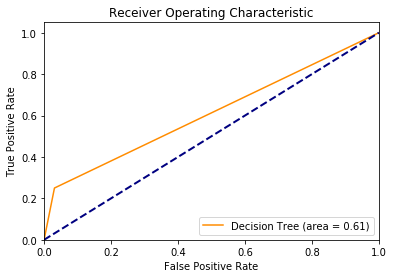

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, decision.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
pre=random.predict(X_test)

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pre)
roc_auc

0.6133720930232558

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pre)
cm

array([[126,   3],
       [  6,   2]], dtype=int64)

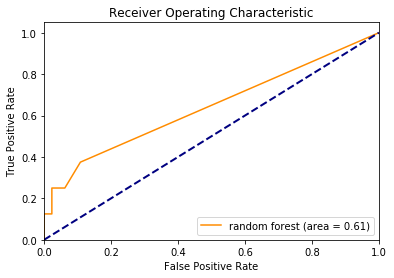

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
fpr, tpr, thresholds = roc_curve(y_test, random.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='random forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [3]:
pwd

'D:\\Users\\c1438'